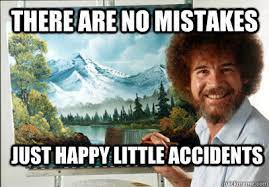

# Pick an image you like

Make sure that it is a color photograph, not some graphic or comic!

## Load the image in color and visualize it

In [1]:
import matplotlib.image as mpimg
from matplotlib import pyplot as plt
import numpy as np
import matplotlib.colors as colors
import cv2

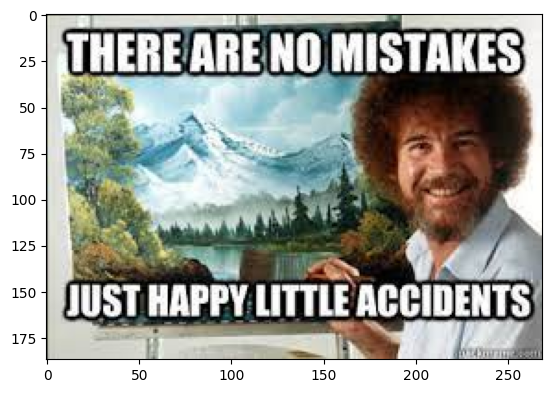

In [11]:
img = plt.imread(r"C:\Users\nessl\OneDrive\Desktop\Studium\Semester 4\Bildverstehen\Praktikum\Praktikum 2\bob_ross.jpg")
plt.imshow(img, cmap='grey')

## Have a look at it a get a visual feeling if its characteristics. What values would you expect from the image?

# Write a function that converts the RGB image into a greyscale image based on the intensity average

For the rest of this practical course, work with the greyscale version

In [84]:
def convert_to_grey(img):
    new_img = np.empty(img.shape).astype(img.dtype)
    for idx_row, row in enumerate(img):
        for idx_col, vals in enumerate(row):
            mean_val = np.round(np.mean(vals).astype(img.dtype))
            new_img[idx_row][idx_col] = mean_val
    return new_img
    # return np.round(np.mean(img, axis=2).astype(img.dtype))

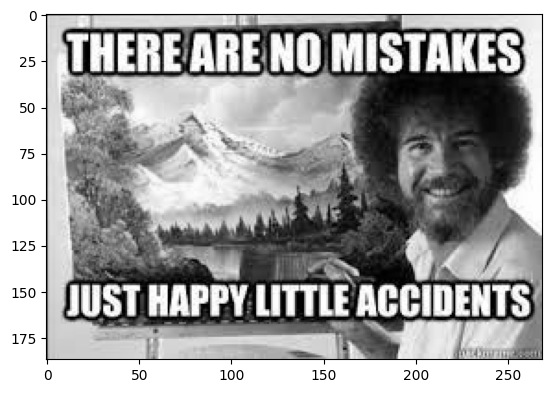

In [85]:
grey_img = convert_to_grey(img)
plt.imshow(grey_img, cmap='grey')

# Write a function that calculates the mean and test it on your image

In [87]:
def get_mean(img):
    return np.round(np.mean(img))

In [93]:
print(f"The mean value over this image is {int(get_mean(grey_img))}")

The mean value over this image is 141


# Write a function that calculates the mean square deviation and test it on your image

In [97]:
def get_deviation(img):
    return np.round(np.std(img))

In [98]:
print(f"The mean square deviation over this image is {int(get_deviation(grey_img))}")

The mean square deviation over this image is 81


# Histogram

## Write a function to plot the histogram of your image

In [115]:
def get_histogram(img): 
    hist = cv2.calcHist([img], [0], None, [256], [0, 256])
    return hist/np.sum(hist)


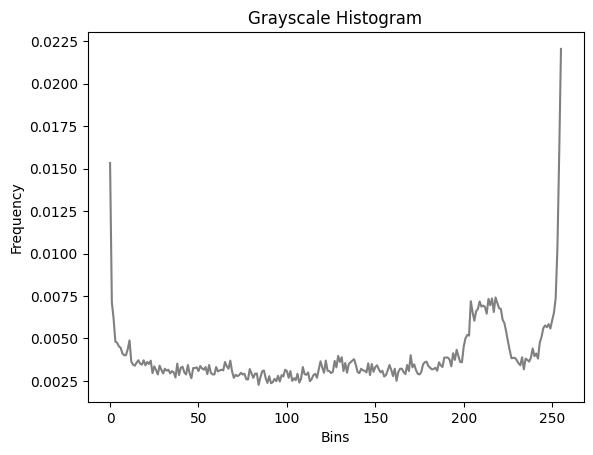

In [123]:
plt.plot(get_histogram(grey_img), color='grey')
plt.title('Grayscale Histogram')
plt.xlabel('Bins')
plt.ylabel('Frequency')
plt.show()

## Add plotting the cumulative frequencies to the histogram function

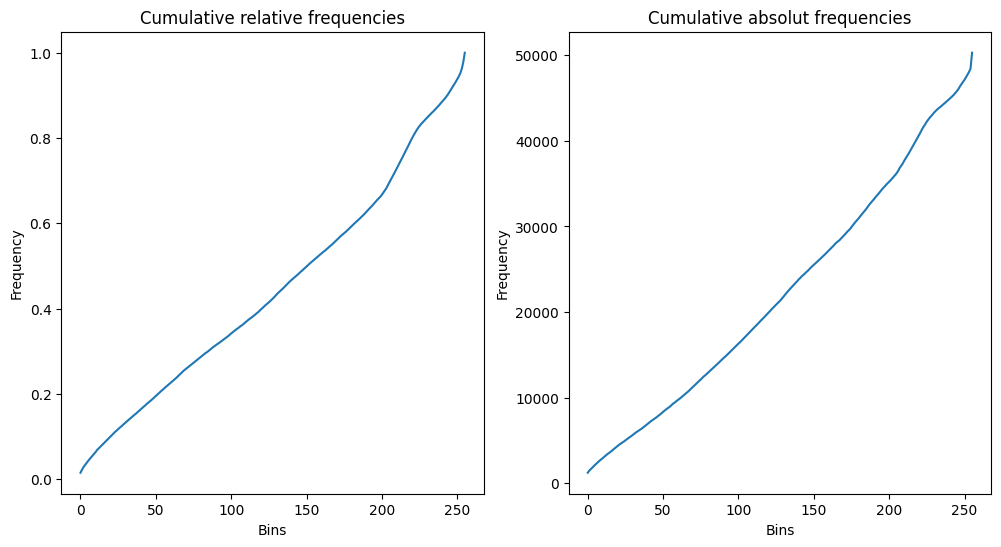

In [130]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].plot(np.cumsum(get_histogram(grey_img)))
axs[0].set_title('Cumulative relative frequencies')
axs[0].set_xlabel('Bins')
axs[0].set_ylabel('Frequency')

axs[1].plot(np.cumsum(cv2.calcHist([img], [0], None, [256], [0, 256])))
axs[1].set_title('Cumulative absolut frequencies')
axs[1].set_xlabel('Bins')
axs[1].set_ylabel('Frequency')
plt.show()

## Update the function to return the frequencies

# Write a function that sets all pixels to a given values based on a given threshold and test it on your image

In [138]:
def set_threshold(img, threshold):
    return np.where(img > threshold, threshold, img)

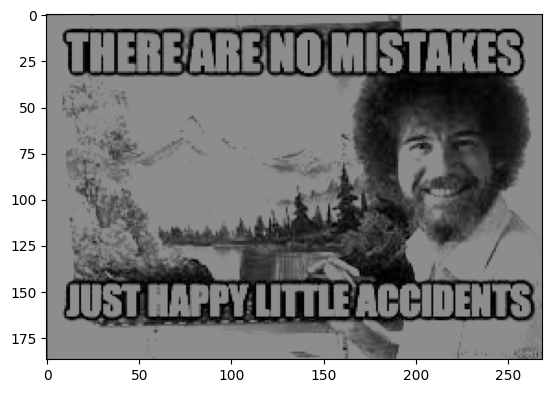

In [141]:
plt.imshow(set_threshold(grey_img, int(get_mean(grey_img))))

# Write a function that calculates the entropy based on the frequencies returned from the histogram and test it on your image

In [147]:
def get_entropy(hist):
    probabilities = hist / np.sum(hist)
    return np.round(-np.sum(probabilities * np.log2(probabilities + np.finfo(float).eps)), 2)

In [148]:
get_entropy(get_histogram(grey_img))

7.87

# Write a function that linear normalizes an image and test it on your image

## Implement a naive version and measure the time it takes on your test image

## Change your function to use a Look-up-Table and see if it gets faster